# Problem Statement:

---


Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import joblib  # for saving/loading the model

In [27]:
df = pd.read_csv("train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Explore Data

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [29]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Cleaning

## Check the Missing Values

In [30]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Preprocess the Data

## Fill the Missing Values in `LoanAmount` and `Credit_History` by the **Mean** and **Median** of the respective varibales.

In [31]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [32]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [33]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

## Drop all the missing values remaining

In [34]:
df.dropna(inplace=True)

In [35]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

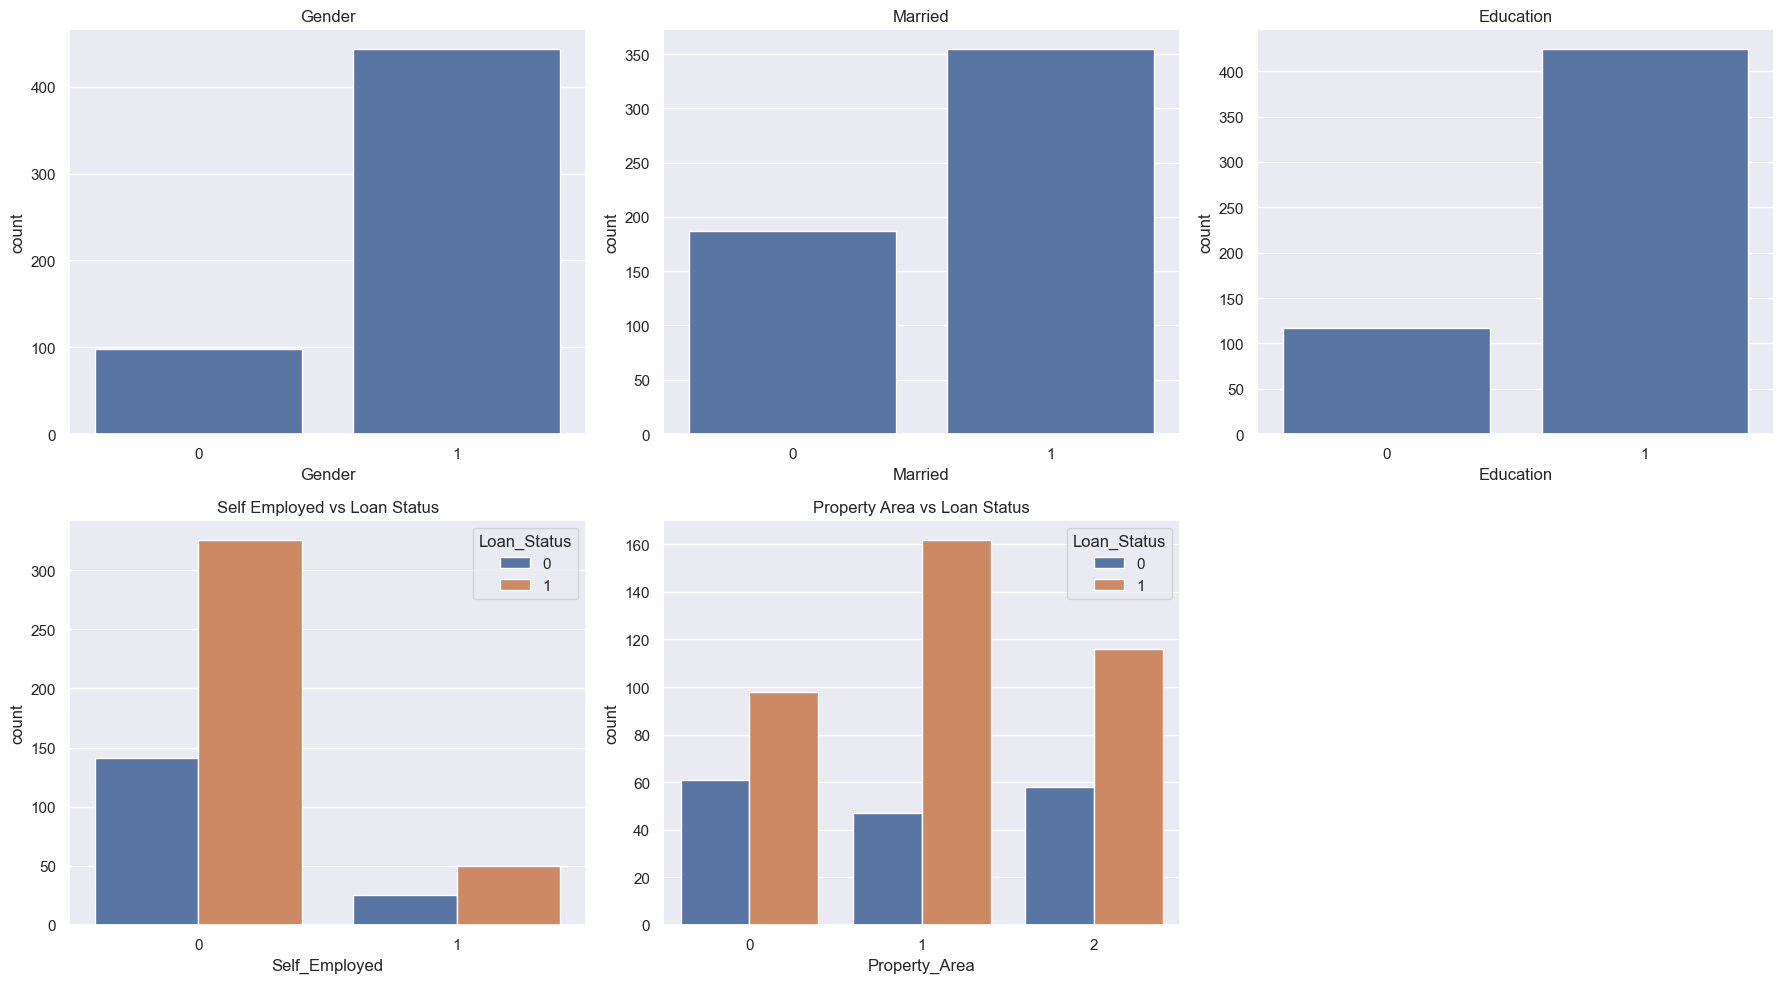

In [68]:
# Reset Seaborn settings to default
sns.set_theme()  # resets font scale and other settings

# Create a new figure with appropriate size
plt.figure(figsize=(18, 10))

# Gender plot
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Gender')
plt.title('Gender')

# Married plot
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Married')
plt.title('Married')

# Education plot
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='Education')
plt.title('Education')

# Self_Employed vs Loan Status
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='Self_Employed', hue='Loan_Status')
plt.title('Self Employed vs Loan Status')

# Property_Area vs Loan Status
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='Property_Area', hue='Loan_Status')
plt.title('Property Area vs Loan Status')

# Automatically adjust spacing
plt.tight_layout()
plt.show()


#  Encoding categorical variables

In [50]:
df['Loan_Status'].value_counts()

Loan_Status
Y    376
N    166
Name: count, dtype: int64

In [51]:
df['Loan_Status'].replace('Y',1, inplace=True)
df['Loan_Status'].replace('N',0, inplace=True)

C:\Users\FAST COMPUTER 1999\AppData\Local\Temp\ipykernel_10896\4091224091.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Loan_Status'].replace('N',0, inplace=True)


In [52]:
df['Loan_Status'].value_counts()

Loan_Status
1    376
0    166
Name: count, dtype: int64

In [53]:
df['Gender'].value_counts()

Gender
Male      444
Female     98
Name: count, dtype: int64

In [54]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['Gender'].value_counts()

Gender
1    444
0     98
Name: count, dtype: int64

In [55]:
df['Married'].value_counts()

Married
Yes    355
No     187
Name: count, dtype: int64

In [56]:
df['Married'] = df['Married'].map({'Yes':1 ,'No':0})
df['Married'].value_counts()

Married
1    355
0    187
Name: count, dtype: int64

In [57]:
df['Dependents'].value_counts()

Dependents
0     309
1      94
2      94
3+     45
Name: count, dtype: int64

In [58]:
df['Dependents'] = df['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})
df['Dependents'].value_counts()

Dependents
0    309
1     94
2     94
3     45
Name: count, dtype: int64

In [59]:
df['Education'].value_counts()

Education
Graduate        425
Not Graduate    117
Name: count, dtype: int64

In [60]:
df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0})
df['Education'].value_counts()

Education
1    425
0    117
Name: count, dtype: int64

In [62]:
df['Self_Employed'] =df['Self_Employed'].value_counts()

Self_Employed
No     467
Yes     75
Name: count, dtype: int64

In [63]:
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1, 'No':0})
df['Self_Employed'].value_counts()

Self_Employed
0    467
1     75
Name: count, dtype: int64

In [64]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    209
Urban        174
Rural        159
Name: count, dtype: int64

In [65]:
df['Property_Area'] = df['Property_Area'].map({'Urban':2, 'Semiurban':1, 'Rural':0})
df['Property_Area'].value_counts()

Property_Area
1    209
2    174
0    159
Name: count, dtype: int64

In [71]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


# Spliting the data into Train and Test Set

In [73]:
X = df.iloc[:,1:12]
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2


In [76]:
y = df.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 542, dtype: int64

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=20)

In [97]:
model = LogisticRegression()

In [98]:
model.fit(X_train,y_train)

C:\Users\FAST COMPUTER 1999\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
y_pred = model.predict(X_test)

In [100]:
print("Logistics Regression Accuracy: ",accuracy_score(y_pred, y_test))

Logistics Regression Accuracy:  0.8532110091743119


# Saving Model

In [109]:
joblib.dump(model, "loan_predict_model.pkl")

['loan_predict_model.pkl']